In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sparshjain8287","key":"ec7b20617be61dd75d5c92c221b97e06"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!kaggle datasets download -d sshubam/insat3d-infrared-raw-cyclone-images-20132021

Dataset URL: https://www.kaggle.com/datasets/sshubam/insat3d-infrared-raw-cyclone-images-20132021
License(s): CC0-1.0
 99% 43.0M/43.2M [00:01<00:00, 38.8MB/s]
100% 43.2M/43.2M [00:01<00:00, 25.7MB/s]


In [4]:
!unzip /content/insat3d-infrared-raw-cyclone-images-20132021.zip

Archive:  /content/insat3d-infrared-raw-cyclone-images-20132021.zip
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/101.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/102.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/106.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/111.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/112.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/115.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/118.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/119.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/128.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/25.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/27.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/28.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30(1).jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30.jpeg  
  inflating: insat3d_for

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("/content/insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/insat3d_ir_cyclone_ds"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

os.mkdir("test_data")

import os
import shutil

source = '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'
destination = '/content/test_data'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles[133:]:

    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)


#Get the classes drammatically
import pathlib
data_dir=pathlib.Path("/content/insat3d_ir_cyclone_ds")
data_dir

There are 1 directories and 0 images in '/content/insat3d_ir_cyclone_ds'.
There are 0 directories and 136 images in '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'.


PosixPath('/content/insat3d_ir_cyclone_ds')

In [7]:
#Let visualise our images
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on

In [9]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import imgaug.augmenters as iaa

# Define the folder path containing your images
folder_path = '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/'

# Load dataset and corresponding labels
df = pd.read_csv('/content/insat_3d_ds - Sheet.csv')

# Define augmentation pipeline
seq = iaa.Sequential([
    iaa.Flipud(0.5),  # vertically flip 50% of images
    iaa.Affine(rotate=(-10, 10)),  # rotate images by -10 to 10 degrees
    iaa.GaussianBlur(sigma=(0, 1.0))  # apply gaussian blur with sigma between 0 and 1.0
])

# List to store augmented image filenames and labels
augmented_data = []

# Apply augmentation to images
for index, row in df.iterrows():
    image_filename = row['img_name']  # assuming 'img_name' is the column containing image filenames
    image_path = os.path.join(folder_path, image_filename)  # construct full path to image file
    image = Image.open(image_path)  # load image
    image_aug_np = seq(image=np.array(image))  # apply augmentation
    image_aug = Image.fromarray(image_aug_np)  # convert augmented numpy array back to image
     # Get the directory of the original image
    image_dir = os.path.dirname(image_path)

    # Save augmented image to the same directory as the original image
    output_filename = f"aug_{index}.jpg"
    output_path = os.path.join(image_dir, output_filename)
    image_aug.save(output_path)  # save augmented image
    # Update labels if necessary and save them
    # e.g., df.at[index, 'intensity'] = updated_intensity_value

     # Append the augmented image filename and its intensity to the list
    augmented_data.append({'img_name': output_filename, 'label': row['label']})

# Create a DataFrame from the augmented data list
augmented_df = pd.DataFrame(augmented_data)

# Concatenate the original DataFrame and the augmented DataFrame
df_augmented = pd.concat([df, augmented_df], ignore_index=True)

# Save the updated DataFrame back to the original CSV file
df_augmented.to_csv('/content/insat_3d_ds - Sheet.csv', index=False)

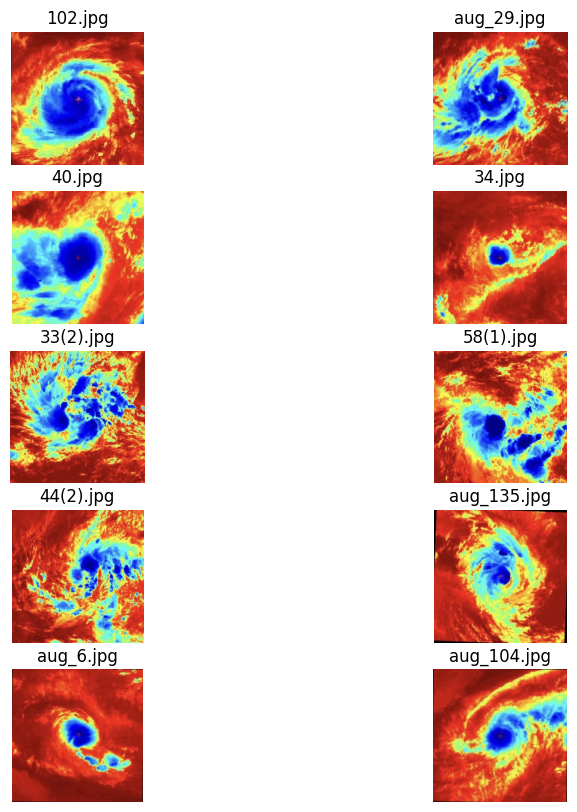

In [10]:
view_random_image("/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("/content/insat_3d_ds - Sheet.csv")

In [12]:
train_dir="/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 272 validated image filenames.


In [13]:
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define custom metrics functions
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

def r2(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())


In [14]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

inputs=Input(shape=(256,256,3))

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
Customized_CNN1=Model(inputs=inputs,outputs=outputs)

Customized_CNN1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 256, 256, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                            

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


Customized_CNN1.compile(optimizer=optimizer,
              loss='mse',  # Mean Squared Error loss for regression
              metrics=[ 'mae', 'mse', RootMeanSquaredError(), MeanAbsoluteError(), r2])



In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model with early stopping callback
history_Cust1= Customized_CNN1.fit(train_data,
                    epochs=85,  # Limit the number of epochs
                    validation_data=train_data,
                    callbacks=[early_stopping])

Epoch 1/85
17/17 [==============================] - 65s 1s/step - loss: 3150.1697 - mae: 46.3208 - mse: 2663.2136 - root_mean_squared_error: 51.6063 - mean_absolute_error: 46.3208 - r2: -6.3938 - val_loss: 2963.6873 - val_mae: 44.4416 - val_mse: 2474.6182 - val_root_mean_squared_error: 49.7455 - val_mean_absolute_error: 44.4416 - val_r2: -7.8793
Epoch 2/85
17/17 [==============================] - 19s 1s/step - loss: 1629.6964 - mae: 25.8018 - mse: 1140.0808 - root_mean_squared_error: 33.7651 - mean_absolute_error: 25.8018 - r2: -1.5575 - val_loss: 7041.1992 - val_mae: 75.7126 - val_mse: 6551.5132 - val_root_mean_squared_error: 80.9414 - val_mean_absolute_error: 75.7126 - val_r2: -19.1339
Epoch 3/85
17/17 [==============================] - 19s 1s/step - loss: 973.1544 - mae: 15.8319 - mse: 484.0479 - root_mean_squared_error: 22.0011 - mean_absolute_error: 15.8319 - r2: -0.0421 - val_loss: 8110.3521 - val_mae: 82.4108 - val_mse: 7622.1021 - val_root_mean_squared_error: 87.3046 - val_mean

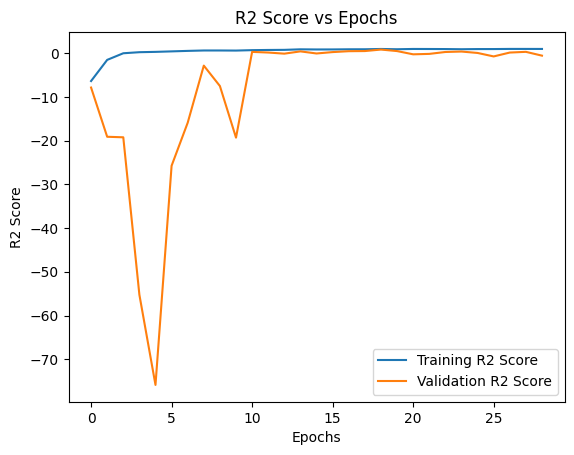

In [17]:
plt.plot(history_Cust1.history['r2'], label='Training R2 Score')
plt.plot(history_Cust1.history['val_r2'], label='Validation R2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Epochs')
plt.legend()

In [18]:
import numpy as np

# Get the best scores for each metric
best_val_loss = np.min(history_Cust1.history['val_loss'])
# best_val_accuracy = np.max(history_Cust1.history['val_accuracy'])
best_val_mae = np.min(history_Cust1.history['val_mae'])
best_val_mse = np.min(history_Cust1.history['val_mse'])
best_val_rmse = np.min(history_Cust1.history['root_mean_squared_error'])
best_val_r2 = np.max(history_Cust1.history['r2'])

# # Print the best scores
# print("Best Validation Loss:", best_val_loss)
# # print("Best Validation Accuracy:", best_val_accuracy)
# print("Best Validation Mean Absolute Error (MAE):", best_val_mae)
# print("Best Validation Mean Squared Error (MSE):", best_val_mse)
# print("Best Validation Root Mean Squared Error (RMSE):", best_val_rmse)
print("Best Validation R^2 Score:", best_val_r2)


Best Validation R^2 Score: 0.9499777555465698


1/1 [==============================] - 0s 92ms/step


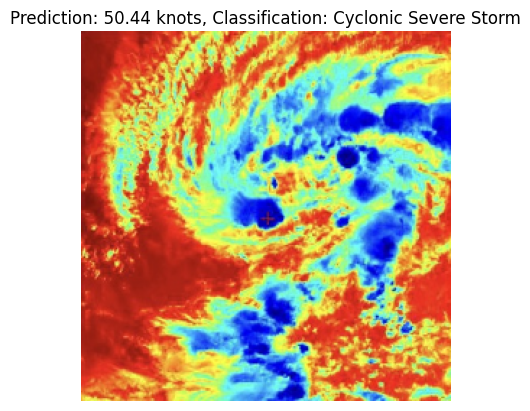

In [25]:
def load_and_prep_image(filename, img_shape=256):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

image_filename = "/content/test_data/46(1).jpg"
def classify_intensity_category(intensity):
    if intensity < 18:
        return "Low/No Cyclone"
    elif intensity >= 18 and intensity<=28:
        return "Cyclone Depression"
    elif intensity >=29 and intensity<=34:
        return "Deep Cyclone Depression"
    elif intensity>=35 and intensity<=48:
        return "Cyclonic Storm"
    elif intensity >=49 and intensity<=64:
        return "Cyclonic Severe Storm"
    elif intensity >=65 and intensity<=89:
        return "Very Cyclonic Severe Storm"
    elif intensity >=90 and intensity<=120:
        return "Extremely Cyclonic Severe Storm"
    elif intensity>120:
        return "Cyclonic Super Storm"


def pred_and_plot_with_classification(model, filename):
    img = load_and_prep_image(filename)

    # Make a prediction of the model
    pred = model.predict(tf.expand_dims(img, axis=0))[0, 0]

    # Classify the intensity
    intensity_category = classify_intensity_category(pred)

    # Plot the image and predicted value
    plt.imshow(img)
    plt.title(f"Classification: {intensity_category}")
    plt.title(f"Prediction: {pred:.2f} knots, Classification: {intensity_category}")
    plt.axis(False)

# Example of making a prediction and plotting an image with classification
pred_and_plot_with_classification(Customized_CNN1,image_filename)